In [5]:
# importing required modules
import PyPDF2

# creating a pdf file object
pdfFileObj = open('Lorem_ipsum.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)

# printing number of pages in pdf file
print(len(pdfReader.pages))

# creating a page object
pageObj = pdfReader.pages[0]

1


In [8]:
print(pageObj.extract_text())

Test PDF  
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the 
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type 
and scrambled it to make a type specimen book. It has sur vived not only five centuries, but also the leap 
into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the 
release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing 
software like Aldus PageMaker including versions of Lorem Ipsum.  
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the 
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type 
and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap 
into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with

In [9]:
# Closing the pdf file object
# pdfFileObj.close()

In [10]:
count = 0
text = ""
while count < len(pdfReader.pages):
    pageObj = pdfReader.pages[count]
    count += 1
    text += pageObj.extract_text()
print(text)
    

Test PDF  
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the 
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type 
and scrambled it to make a type specimen book. It has sur vived not only five centuries, but also the leap 
into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the 
release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing 
software like Aldus PageMaker including versions of Lorem Ipsum.  
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the 
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type 
and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap 
into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with

In [ ]:
pageObj = pdfReader.pages[0]
pdf_document_writer = PyPDF2.PdfWriter()
pdf_document_writer.add_page(pageObj)

In [14]:
pdf_output = open('new_file.pdf', 'wb')
pdf_document_writer.write(pdf_output)

(False, <_io.BufferedWriter name='new_file.pdf'>)

In [15]:
pdfFileObj.close()
pdf_document_writer.close()
pdf_output.close()

In [16]:
def merge_pdf(pdfs, output):
    pdfMerger = PyPDF2.PdfMerger()

    for pdf in pdfs:
        pdfMerger.append(pdf)

    with open(output, 'wb') as f:
        pdfMerger.write(f)

In [20]:
pdfs = ['Lorem_ipsum.pdf', 'new_document.pdf']
output = 'new_file.pdf'
merge_pdf(pdfs, output)

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
news = fetch_20newsgroups(subset='all')

In [4]:
print(len(news.data))

18846


In [5]:
print(len(news.target_names))

20


In [6]:
print(news.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.model_selection import train_test_split


def train_test(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)
    classifier.fit(X_train, y_train)
    print(f"Classifier accuracy on test is {classifier.score(X_test, y_test)}")
    print(f"Classifier accuracy on train is {classifier.score(X_train, y_train)}")
    return classifier

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

def train_test(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)
    classifier.fit(X_train, y_train)

    print("Classifier accuracy Test is {}".format(classifier.score(X_test, y_test)))
    print("Classifier accuracy Train is {}".format(classifier.score(X_train, y_train)))
    
    print("#####################")
    try:
        # predict probabilities
        pred_prob1 = classifier.predict_proba(X_test)
        pred_prob2 = classifier.predict_proba(X_train)

        # roc curve for models
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        fpr2, tpr2, thresh1 = roc_curve(y_train, pred_prob2[:,1], pos_label=2)

        # roc curve for tpr = fpr 
        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

        plt.plot(fpr1, tpr1,color='orange', label='test')
        plt.plot(fpr2, tpr2, color='green', label='train')
        plt.title('ROC curve for test')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.savefig('Multiclass ROC',dpi=300); 
        plt.show()
        
    except:
        print("")
    
    return classifier


def random_search(classifier, parameters, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)
    gs_clf = RandomizedSearchCV(classifier, parameters, n_jobs=-1)
    gs_clf = gs_clf.fit(X_train, y_train)
    
    print("Best score: ", gs_clf.best_score_)
    print("Best params: ", gs_clf.best_params_)

    return gs_clf

In [52]:
trail1 = Pipeline([('vectorizer', TfidfVectorizer()),
                   ('classifier', MultinomialNB())])

Classifier accuracy Test is 0.8535653650254669
Classifier accuracy Train is 0.9254987972265459
#####################


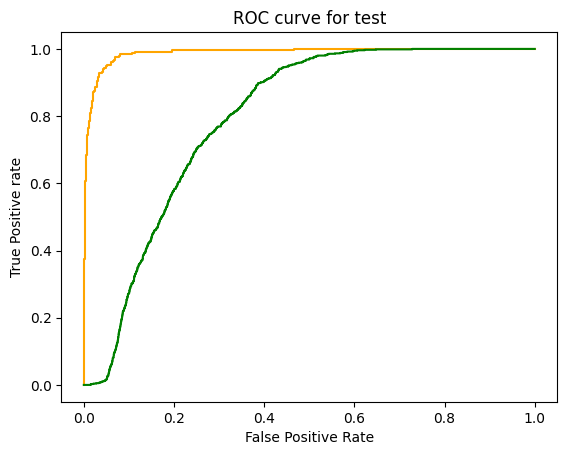

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [54]:
train_test(trail1, news.data, news.target)

Classifier accuracy Test is 0.8828522920203735
Classifier accuracy Train is 0.9472194707796802
#####################


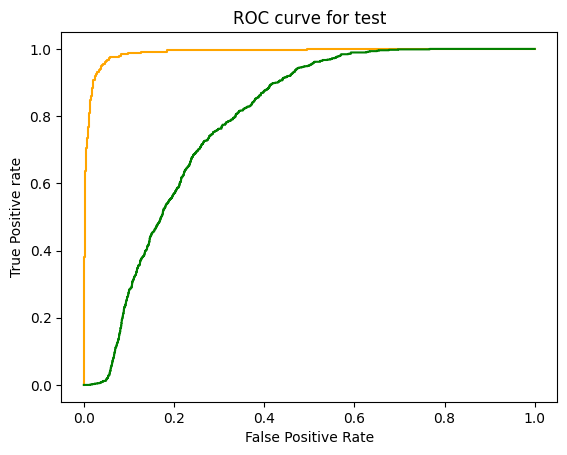

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

In [57]:
from nltk.corpus import stopwords
trial2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
                   ('classifier', MultinomialNB())])

train_test(trial2, news.data, news.target)

In [58]:
import string
import warnings
warnings.filterwarnings('ignore')

trial2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english')
                                                  + list(string.punctuation), min_df=5)),
                   ('classifier', svm.LinearSVC())])

# # hyperparamter tuning for LinearSVC
# linearSVC_parameters = {'vectorizer__max_df': (0.25, 0.5, 0.75),
#                 'vectorizer__ngram_range': ((1, 1), (1, 2)),
#                 'vectorizer__norm': ('l1', 'l2'),
#                 'classifier__C': (0.1, 1, 10, 100, 1000)}

# hyperparamter tuning for LinearSVC
linearSVC_parameters = {
                'classifier__C': (0.1, 1, 10, 100, 1000)}

random_search(trial2, linearSVC_parameters, news.data, news.target)

/Users/sunilthapa/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sunilthapa/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sunilthapa/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sunilthapa/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sunilthapa/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sunilthapa/opt/miniconda3/lib/python3.9/sit

Best score:  0.9122685127815366
Best params:  {'classifier__C': 1}


RandomizedSearchCV(estimator=Pipeline(steps=[('vectorizer',
                                              TfidfVectorizer(min_df=5,
                                                              stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('classifier', LinearSVC())]),
                   n_jobs=-1,
                   param_distributions={'classifier__C': (0.1, 1, 10, 100,
                                                          1000)})

In [59]:
trial2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english')
                                                  + list(string.punctuation), min_df=5)),
                   ('classifier', svm.LinearSVC(
                          C=1
                   ))])

# # hyperparamter tuning for LinearSVC
# linearSVC_parameters = {'vectorizer__max_df': (0.25, 0.5, 0.75),
#                 'vectorizer__ngram_range': ((1, 1), (1, 2)),
#                 'vectorizer__norm': ('l1', 'l2'),
#                 'classifier__C': (0.1, 1, 10, 100, 1000)}

train_test(trial2, news.data, news.target)

Classifier accuracy Test is 0.9276315789473685
Classifier accuracy Train is 0.998584972406962
#####################



Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', LinearSVC(C=1))])

In [61]:
# call random_search for random forest
import numpy as np
trial3 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english')
                                                    + list(string.punctuation), min_df=5)),
                     ('classifier', RandomForestClassifier())])

# hyperparamter tuning for RandomForestClassifier
randomForest_parameters = {
                'classifier__n_estimators': np.arange(10, 100, 2),
                'classifier__max_depth': np.arange(1, 20, 2)}

random_search(trial3, randomForest_parameters, news.data, news.target)

Best score:  0.717488849184802
Best params:  {'classifier__n_estimators': 50, 'classifier__max_depth': 17}


RandomizedSearchCV(estimator=Pipeline(steps=[('vectorizer',
                                              TfidfVectorizer(min_df=5,
                                                              stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'classifier__n_estimators': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])})

Classifier accuracy Test is 0.7328098471986417
Classifier accuracy Train is 0.8184519598132164
#####################


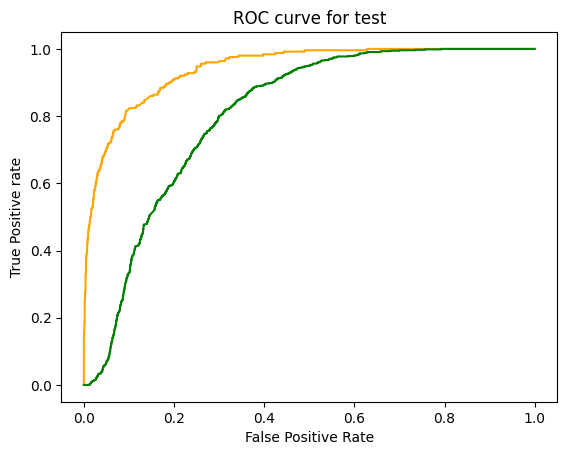

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier',
                 RandomForestClassifier(max_depth=17, n_estimators=50))])

In [62]:
trial3 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english')
                                                    + list(string.punctuation), min_df=5)),
                     ('classifier', RandomForestClassifier(
                            n_estimators=50,
                            max_depth=17
                     ))])
train_test(trial3, news.data, news.target)

In [28]:
!pip install xgboost

     |████████████████████████████████| 1.6 MB 4.1 MB/s eta 0:00:01


In [64]:
# Similar on XGboost
import xgboost as xgb
import scipy.stats as st 

trial4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english')
                                                    + list(string.punctuation), min_df=5)),
                        ('xgbcl', xgb.XGBClassifier())])
params = {
    "xgbcl__n_estimators": st.randint(3, 10),
    "xgbcl__learning_rate": st.uniform(0.05, 0.01)
}
random_search(trial4, params, news.data, news.target)
# hyperparamter tuning for XGBClassifier
# xgb_parameters = {
#                 'vectorizer__ngram_range': ((1, 1)),
#                 'vectorizer__norm': ('l1', 'l2'),
#                 'classifier__n_estimators': np.arange(10, 100, 2),
#                 'classifier__max_depth': np.arange(1, 20, 3),
#                 'classifier__learning_rate': (0.01, 0.1, 0.2),}

# random_search(trial4, xgb_parameters, news.data, news.target)

Best score:  0.732065155758432
Best params:  {'xgbcl__learning_rate': 0.053726024855802065, 'xgbcl__n_estimators': 9}


RandomizedSearchCV(estimator=Pipeline(steps=[('vectorizer',
                                              TfidfVectorizer(min_df=5,
                                                              stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                                                                          "you'll",
                                                                          "you'd",
                                                                          'your',
                                                                          'yours',
                                                                          'yourself',
                                                                          'yourselves',
                                                                          'he',
                                                                          'him',
                                                                          'his',
                                                                          'himself',
                                                                          'she',
                                                                          "she's",
                                                                          'her',
                                                                          'hers',
                                                                          'herself',
                                                                          'it',
                                                                          "it's",
                                                                          'its',
                                                                          'itself', ...])),
                                             ('xgbcl',
                                              XGBClassifier(...
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgbcl__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2801145e0>,
                                        'xgbcl__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x29c84c8b0>})

Classifier accuracy Test is 0.7406621392190152
Classifier accuracy Train is 0.7954577614263478
#####################


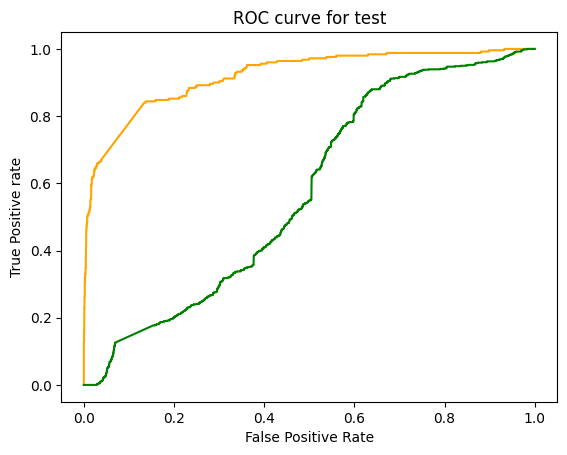

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('xgbcl',
                 XGBClassifier(base_score=None, booster=None,...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.053726024855802065, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=9, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [65]:
trial4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english')
                                                    + list(string.punctuation), min_df=5)),
                        ('xgbcl', xgb.XGBClassifier(
                            n_estimators=9,
                            learning_rate=0.053726024855802065
                        ))])

train_test(trial4, news.data, news.target)